# Data Storm Project Assignment
# Lakmini Bandarigodage
# 206022U

# Introduction of the dataset

More than 40 beverage products are produced by beverage company XYZ, which is distributed to more than 100 retailers. However, when it comes to making crucial decisions like allocating resources, dispersing, and launching new beverage products, they lack a data-driven decision-making process. The business does not use statistics to optimise these judgements instead, it bases them qualitatively on experience. 

The firm wishes to use advanced analytics and machine learning techniques to enhance their decision-making process by doing store profiling on both current and new stores based on their sales and consumer behaviour. Recently, these approaches were shown to be ineffective. The objective is to plan and create an advanced analytics system that Beverages Company XYZ can use to profile stores and improve decision-making.

For the previous six months, they have been gathering diverse data at the shop and customer transaction levels. The goal of shop profiling is to allocate resources like employees, marketing, and equipment to boost the performance of underperforming stores and to streamline the selection of an item range.


# Dataset tables

Historical-transaction-data.csv - contains the historical transaction data set with 488,788 records collected from each customer purchase. The granularity of the data set is at the date-customer-invoice-item level.

Store-info.csv - contains the store info data set with 124 stores with shop space and store profile. The granularity of the data set is at the store level.

Testing-data.csv - the test set for the competition.

Data-dictionary.xlsx - contains the information about data attributes for both data sets.


# The dataset variable description

item_description -     Descriptive name of the items in store

transaction_date -     Date of the transaction happened.

invoice_id	    -     Identification of the invoice issued (Unique code for every bill) 

customer_id	    -     Identification for customer (Unique code for each customer)

shop_id 	    -     Identification for the store (Unique code for each shop)

item_price	    -     Selling price of the item.

quantity_sold	-     Show the quantity purchased of item in particular transaction.

shop_profile	-     Store profile indicator

shop_area_sq_ft -     Area of the store (indicate the size of the store)


In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime

In [2]:
#reading the csv file as a dataframe


"""You need to install the xlrd package to open the csv file"""


df = pd.read_csv("C:\\Users\\EliteBook\\Documents\\Business Science\\Semester 5\\Data Wraggling\\Assignment 2\\Data_storm_dataset\\Tables\Historical-transaction-data.csv")

Item price, quantity sold, shop id, and customer id are critical factors that must be taken into account in order to make decisions that are essential to store profiling on existing and new stores based on their sales and customer behaviours as they have a direct impact on the sales of the Beverages Company XYZ.

In [3]:
df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


# Modifying data formats

To do the analysis, it is necessary to verify the data types of each variable and recognise that they may need to be changed.

Since we just require the year, month, and day, we must structure the transaction date accordingly. As a result, the transaction date can be formatted in datetime format.

In [4]:
# Converting transaction date to datetime format

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_date'] = df['transaction_date'].dt.date
df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03,NaN,MSBQ,SHOP077,440,3


Since float is the default data type for invoice id, we must change it to object.

In [5]:
# Converting the "invoice_id" to strings
df['invoice_id'] = df['invoice_id'].astype(str)

# Removing the ".0" from the values in the "invoice_id" 
df['invoice_id'] = df['invoice_id'].str.replace('.0', '', regex=False)

df


,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17,371,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,nan,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02,nan,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19,nan,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03,nan,MSBQ,SHOP077,440,3


In [6]:
#checking the shape of the dataframe

df.shape # (rows, columns)

(473974, 7)

Now it has been approved since invoice id is an object data type, which is the data type for string values.

In [7]:
df.dtypes

item_description    object
transaction_date    object
invoice_id          object
customer_id         object
shop_id             object
item_price           int64
quantity_sold        int64
dtype: object

Since item price is a integer number, we can change the item price to float data type as it the standard way of the representing item price.

In [8]:
#Converting item_price to float

df['item_price'] = df['item_price'].astype(float)

df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220.0,2
1,GINGER BEER 1.5L,2021-10-17,371,IA25,SHOP112,220.0,2
2,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160.0,2
3,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150.0,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310,7S00,SHOP112,210.0,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,nan,X21A,SHOP056,440.0,3
473970,LEMONADE 1.5L,2021-12-02,nan,LV2L,SHOP018,220.0,2
473971,FIT O ORANGE 200ML,2021-11-19,nan,VC4O,SHOP077,210.0,4
473972,CREAM SODA 1.5L,2021-12-03,nan,MSBQ,SHOP077,440.0,3


# Identifying and handing missing values

Firstly, checking the count of missing values in each column in Historical-transaction-data table and recognising any pattern of missing values.


As we can see, missing values that are denoted by nan, meaning that they should also be added when determining the count of the missing values.

In [9]:
data = df.replace("nan", np.NaN)
#data.head()
data.isnull().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

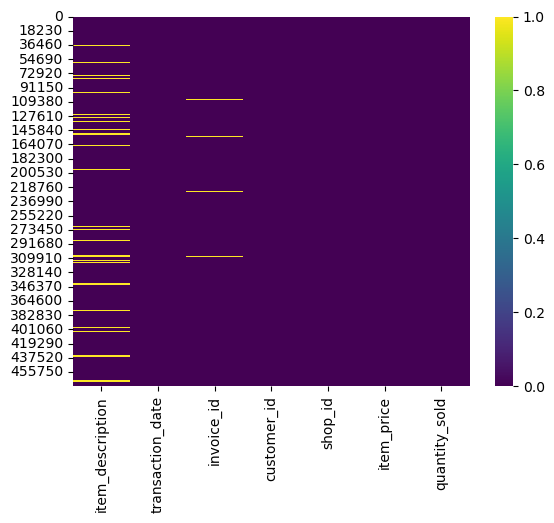

In [10]:
# Create a missingness matrix
missing_matrix = data.isnull()

# Plotting the missingness matrix as a heatmap
sns.heatmap(missing_matrix, cmap='viridis')
plt.show()


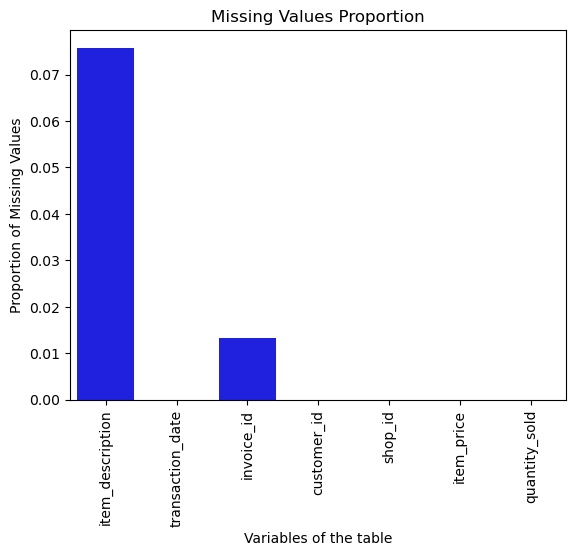

In [11]:
# Calculate the proportion of missing values for each variable
missing_proportion = data.isnull().mean()

# Plotting the proportion of missing values as a bar chart
sns.barplot(x=missing_proportion.index, y=missing_proportion.values, color='blue')
plt.xlabel('Variables of the table')
plt.ylabel('Proportion of Missing Values')
plt.title('Missing Values Proportion')
plt.xticks(rotation=90)
plt.show()

Since the heatmap and bar chart do not show any patterns in the missing values, it is crucial to keep them in place because item description has 35928 missing values, which is a significant number. The best solution is to replace missing values with the string "Not available" in both variables.

In [12]:
# Replacing missing values in item description as 'Not available'
df['item_description'].fillna('Not available', inplace=True)

# Replacing 'nan' values in invoice id with 'Not available'
df['invoice_id'] = df['invoice_id'].replace('nan', 'Not available')

df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220.0,2
1,GINGER BEER 1.5L,2021-10-17,371,IA25,SHOP112,220.0,2
2,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160.0,2
3,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150.0,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310,7S00,SHOP112,210.0,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,Not available,X21A,SHOP056,440.0,3
473970,LEMONADE 1.5L,2021-12-02,Not available,LV2L,SHOP018,220.0,2
473971,FIT O ORANGE 200ML,2021-11-19,Not available,VC4O,SHOP077,210.0,4
473972,CREAM SODA 1.5L,2021-12-03,Not available,MSBQ,SHOP077,440.0,3


In [13]:
# We can now observe that the missing data are no longer present.
df.notnull().sum()

item_description    473974
transaction_date    473974
invoice_id          473974
customer_id         473974
shop_id             473974
item_price          473974
quantity_sold       473974
dtype: int64

# Handling outliers

The next step is to clean the variables to determine the overall picture of sales as we require the item price and amount sold to locate sales. 



In [14]:
# selecting all rows of 'item price' and 'quantity sold' from the table

df_subset = df.loc[:, ['item_price','quantity_sold']]
df_subset

,item_price,quantity_sold
0,220.0,2
1,220.0,2
2,160.0,2
3,150.0,2
4,210.0,5
...,...,...
473969,440.0,3
473970,220.0,2
473971,210.0,4
473972,440.0,3


# The visualisation of item price and quantity sold 

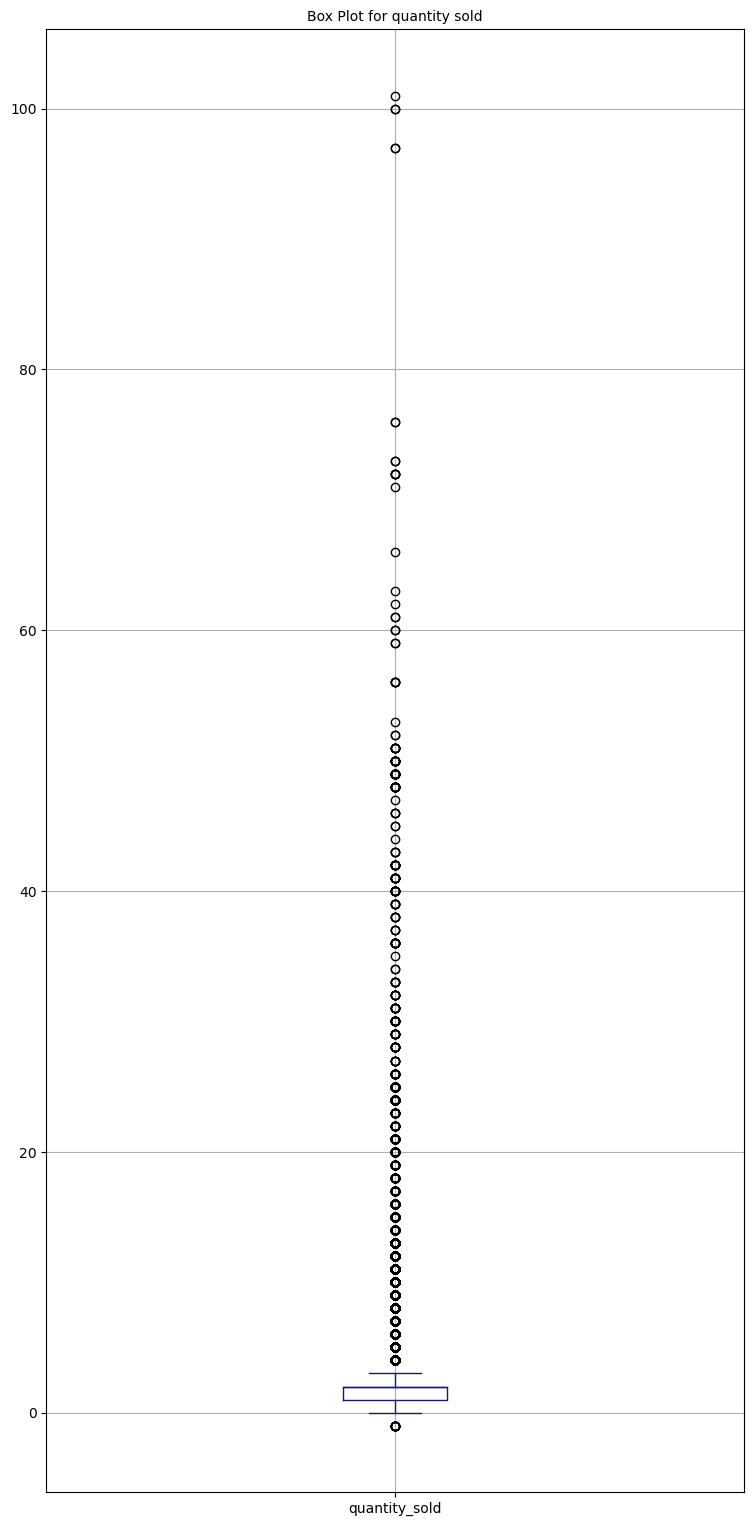

In [15]:
# Box plot for quantity sold

plt.figure(figsize=(9, 19)) 

df_subset.boxplot(column=['quantity_sold'],color='#191970',fontsize=10)
plt.title('Box Plot for quantity sold',fontsize=10)

plt.show()


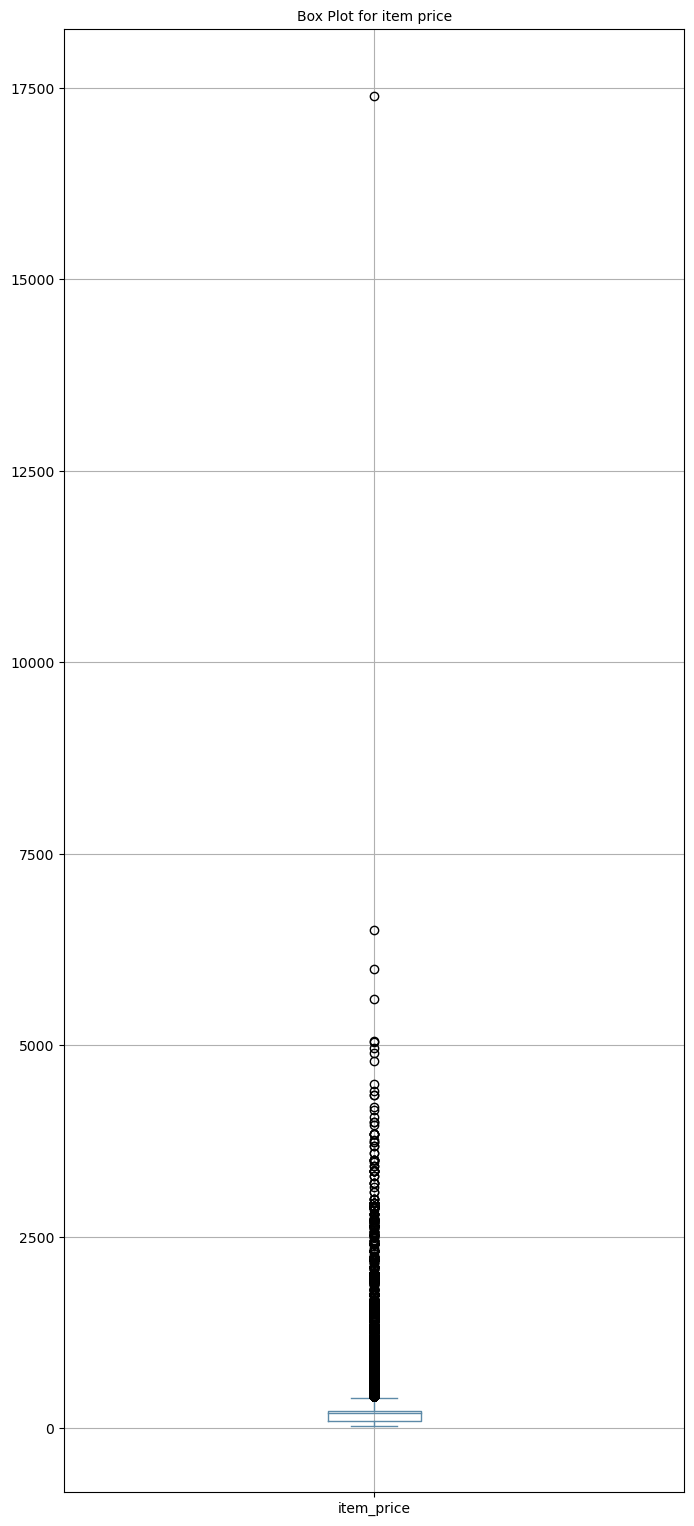

In [16]:
# Box plot for item price

plt.figure(figsize=(8, 19)) 
df_subset.boxplot(column=['item_price'],color='#5d8aa8',fontsize=10)
plt.title('Box Plot for item price',fontsize=10)
plt.show()


By viewing the box plots of quantity sold and item price variables, we can observe that there are several outliers in both item price and quantity sold. It is therefore preferable to eliminate unneeded outliers that might have an impact on the data.


We can use IQR method to remove unnecessary outliers in both item price and quantity sold

In [17]:
# defining Q1 and Q3

Q1 = df_subset.quantile(0.25)
Q3 = df_subset.quantile(0.75)
IQR = Q3 - Q1

# defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtering the dataframe to exclude outliers
df_filtered = df_subset[~((df_subset < lower_bound) | (df_subset> upper_bound)).any(axis=1)]

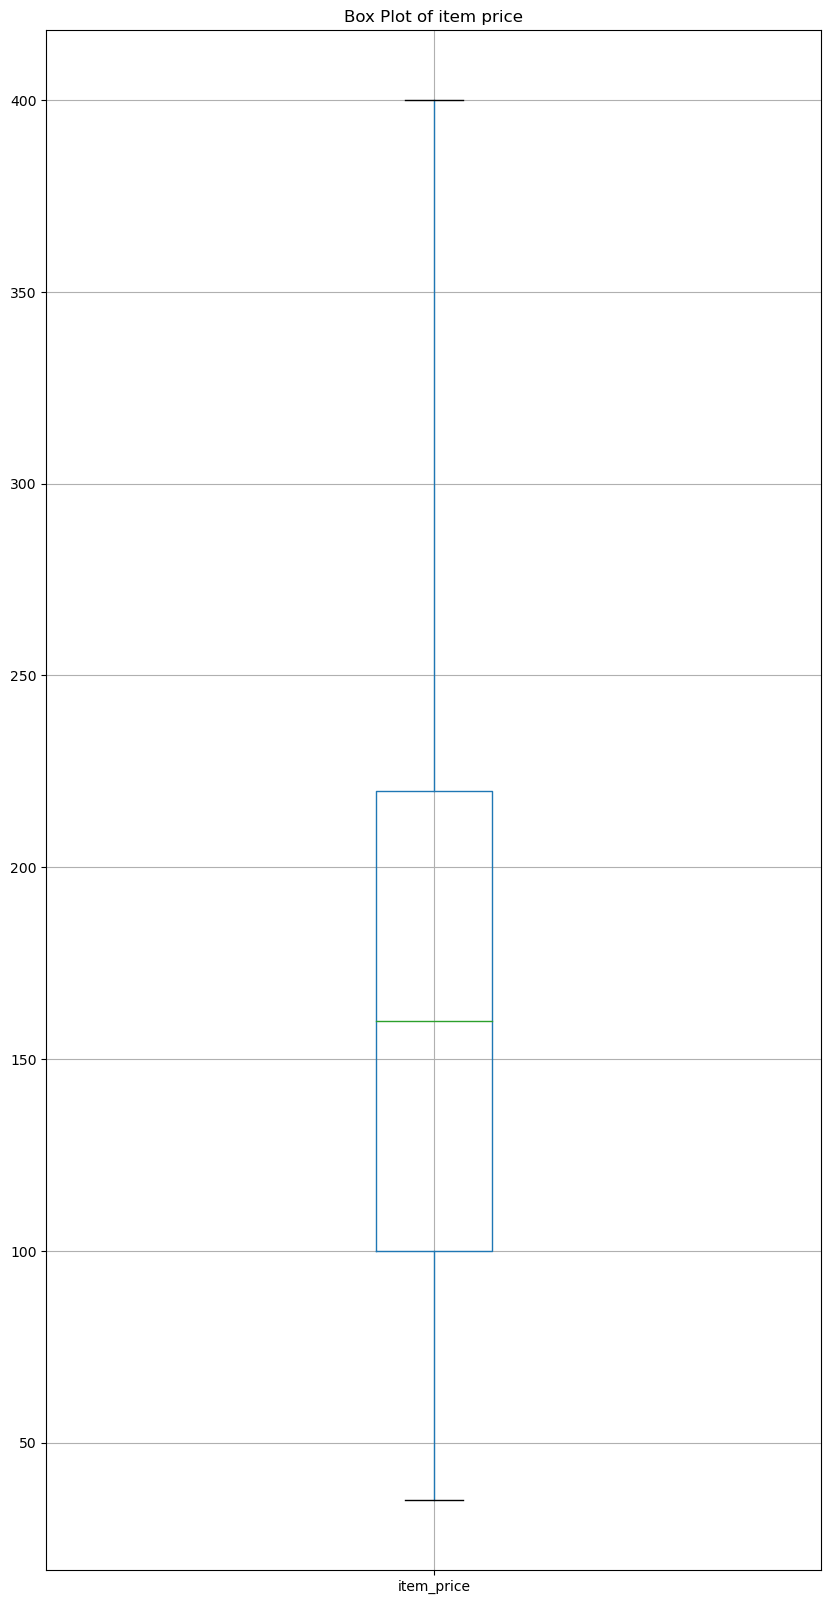

In [18]:
# blox plot for item price after filtering outliers 

plt.figure(figsize=(10, 20)) 

df_filtered.boxplot(column=['item_price'])

plt.title('Box Plot of item price')


plt.show()

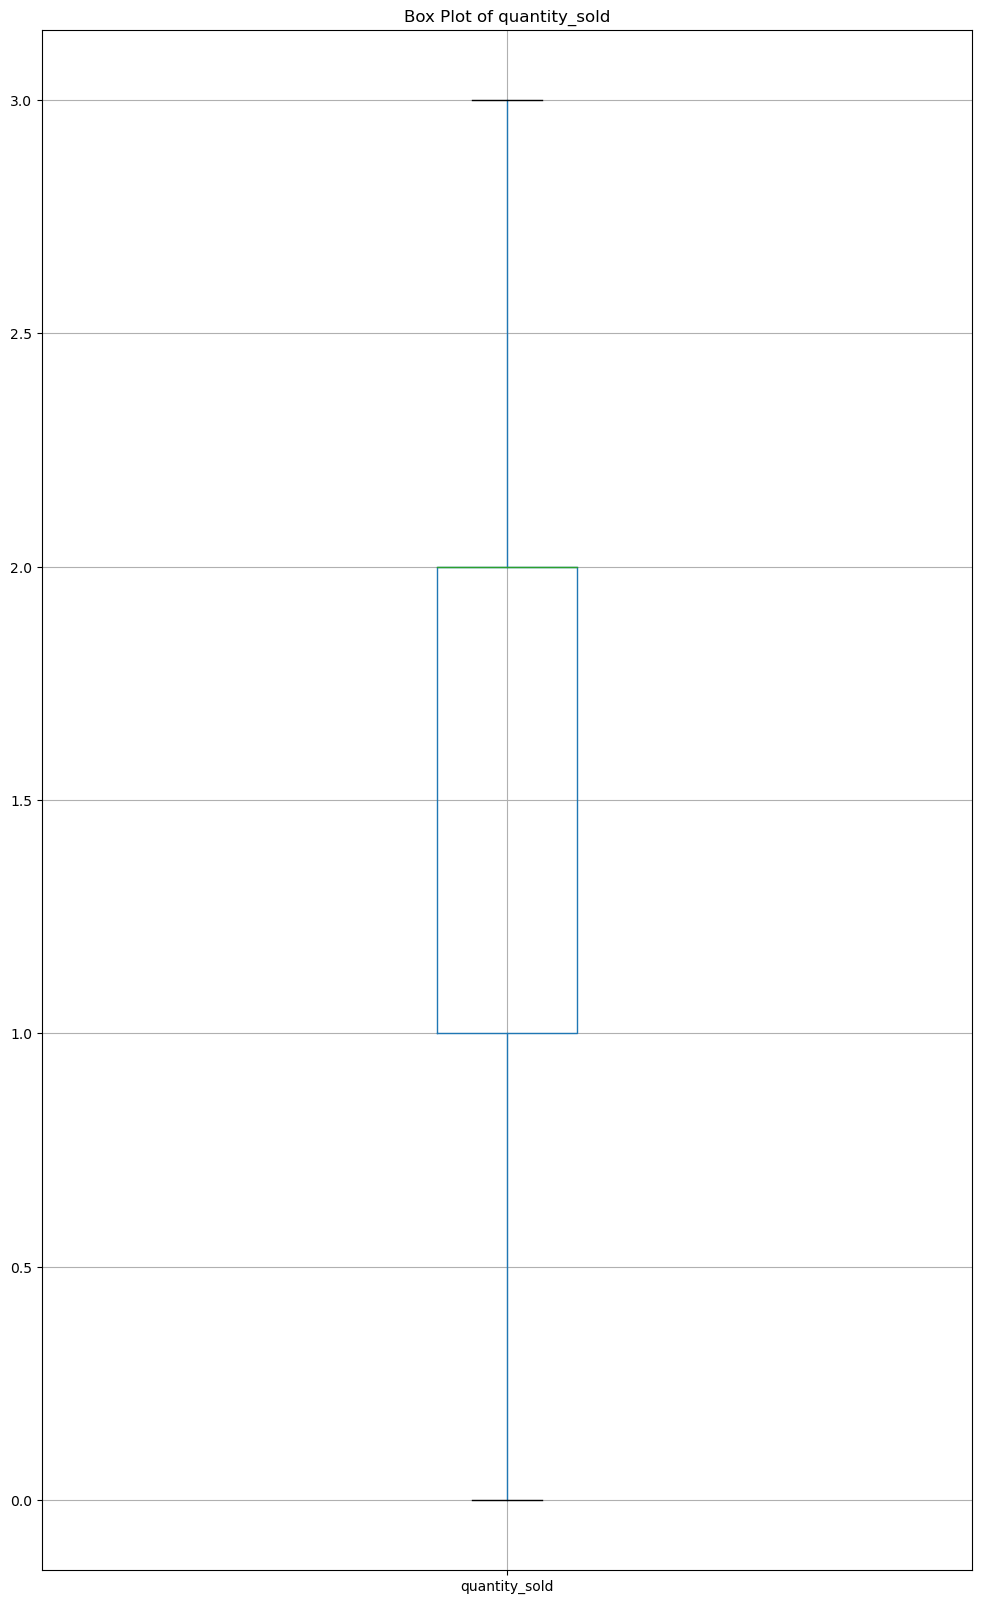

In [19]:
# blox plot for quantity sold after filtering outliers

plt.figure(figsize=(12, 20)) 

df_filtered.boxplot(column=['quantity_sold'])
plt.title('Box Plot of quantity_sold')

plt.show()


We can easily visualise the box plot of item price and quantity sold after removing unnecessary outliers.

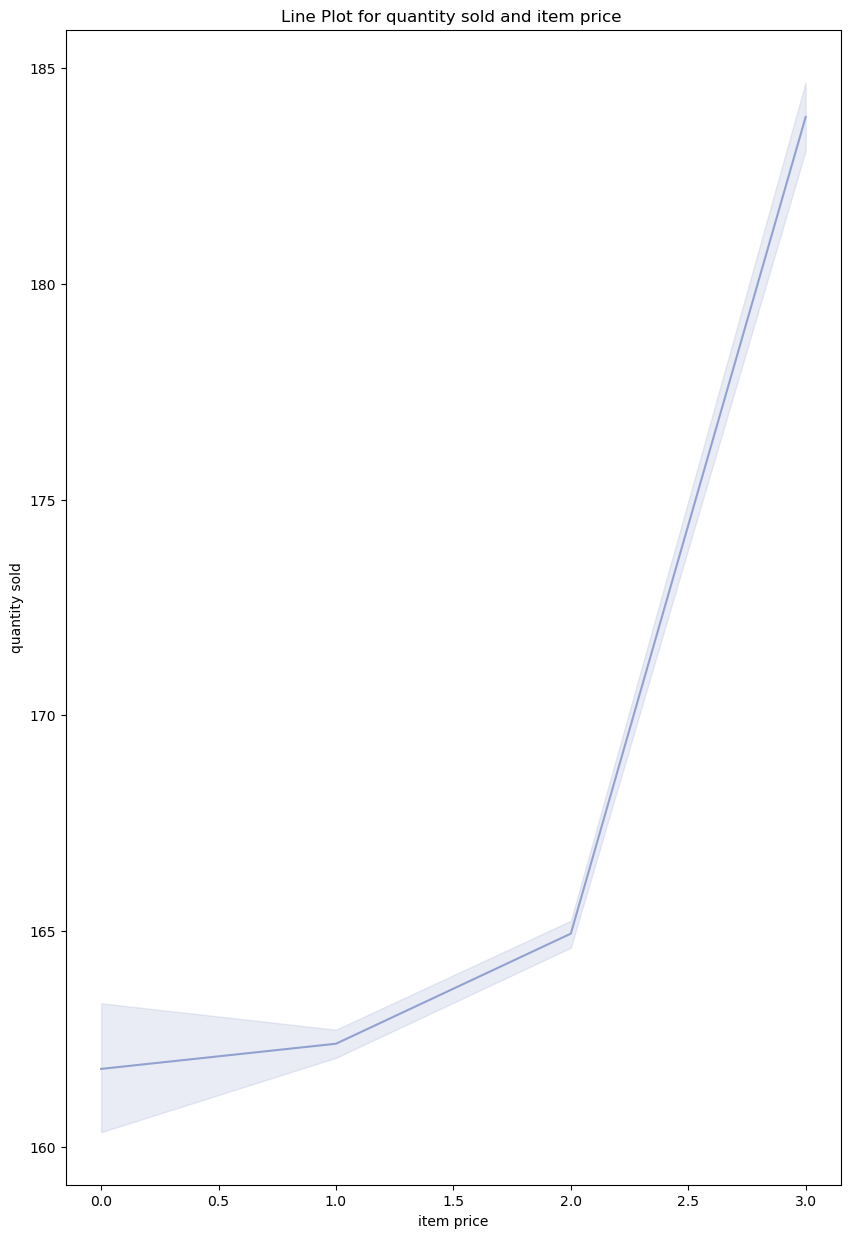

In [20]:
# Line Plot for quantity sold and item price

plt.figure(figsize=(10, 15)) 

sns.lineplot(data=df_filtered, x='quantity_sold', y='item_price', color='#92a1cf')
plt.xlabel('item price')
plt.ylabel('quantity sold')
plt.title('Line Plot for quantity sold and item price ')
plt.show()

Thus, we can see the increase pattern of item price and quantity variables throughout the past six months.

In [21]:
# update the item price and quantity sold after cleaning 

df[['item_price', 'quantity_sold']] = df_filtered[['item_price', 'quantity_sold']]

df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220.0,2.0
1,GINGER BEER 1.5L,2021-10-17,371,IA25,SHOP112,220.0,2.0
2,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160.0,2.0
3,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150.0,2.0
4,STRAWBERRY MILK 180ML,2021-10-23,1310,7S00,SHOP112,NaN,NaN
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,Not available,X21A,SHOP056,NaN,NaN
473970,LEMONADE 1.5L,2021-12-02,Not available,LV2L,SHOP018,220.0,2.0
473971,FIT O ORANGE 200ML,2021-11-19,Not available,VC4O,SHOP077,NaN,NaN
473972,CREAM SODA 1.5L,2021-12-03,Not available,MSBQ,SHOP077,NaN,NaN


In [22]:
#Plugging mean values for missing values in item price and quantity sold

mean_item_price = df['item_price'].mean()
mean_quantity = df['quantity_sold'].mean()
df['item_price'] = df['item_price'].fillna(mean_item_price)

df['quantity_sold'] = df['quantity_sold'].fillna(mean_quantity)
df['quantity_sold'] = df['quantity_sold'].astype(int)
df['item_price'] = df['item_price'].fillna(mean_item_price).round(2)

df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220.00,2
1,GINGER BEER 1.5L,2021-10-17,371,IA25,SHOP112,220.00,2
2,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160.00,2
3,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150.00,2
4,STRAWBERRY MILK 180ML,2021-10-23,1310,7S00,SHOP112,165.37,1
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09,Not available,X21A,SHOP056,165.37,1
473970,LEMONADE 1.5L,2021-12-02,Not available,LV2L,SHOP018,220.00,2
473971,FIT O ORANGE 200ML,2021-11-19,Not available,VC4O,SHOP077,165.37,1
473972,CREAM SODA 1.5L,2021-12-03,Not available,MSBQ,SHOP077,165.37,1


The sales of Beverages Company XYZ during the last six months can be determined by multiplying the item price and the quantity sold.Then we can identify any outliers in the sales variable.

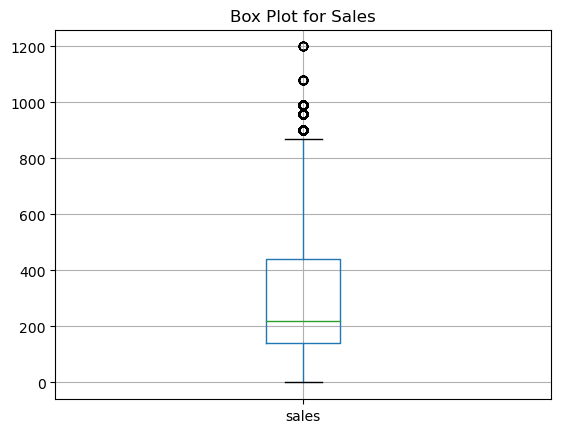

In [23]:
# Getting sales using item price and quantity sold 

df_filtered= df_filtered.copy()
df_filtered['sales'] = df_filtered['quantity_sold'] * df_filtered['item_price']


# Box plot for the sales 
df_filtered.boxplot(column='sales')

# Setting the title for the plot
plt.title('Box Plot for Sales')

# showing the plot
plt.show()

As a result, we can apply the same IQR approach to eliminate sales outliers that we can determine using item price and the quantity sold variables. Then, we can see the histogram of sales after removing unneeded outliers, as well as the box plot of sales.

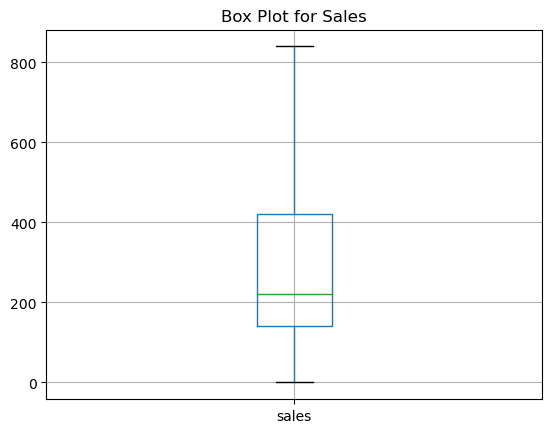

In [24]:
# Calculate the Q1 and Q3 for sales

Q1 = df_filtered['sales'].quantile(0.25)
Q3 = df_filtered['sales'].quantile(0.75)

# Calculate IQR range
IQR = Q3 - Q1

# upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# removing outliers
df_no_outliers = df_filtered[(df_filtered['sales'] >= lower_bound) & (df_filtered['sales'] <= upper_bound)]


# Calculate Q1 and Q3 for 'sales' in df_no_outliers
Q1 = df_no_outliers['sales'].quantile(0.25)
Q3 = df_no_outliers['sales'].quantile(0.75)

# Calculate IQR range
IQR = Q3 - Q1

# upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# removing outliers
df_no_outliers_final = df_no_outliers[(df_no_outliers['sales'] >= lower_bound) & (df_no_outliers['sales'] <= upper_bound)]


# Box plot of the sales after removing outliers
df_no_outliers_final.boxplot(column='sales')


plt.title('Box Plot for Sales')


plt.show()



In [25]:
#item_price , quantity_sold and  sales columns' data

df_no_outliers_final

,item_price,quantity_sold,sales
0,220.0,2,440.0
1,220.0,2,440.0
2,160.0,2,320.0
3,150.0,2,300.0
5,150.0,2,300.0
...,...,...,...
473966,220.0,1,220.0
473967,220.0,1,220.0
473968,220.0,2,440.0
473970,220.0,2,440.0


# The visualization of sales 

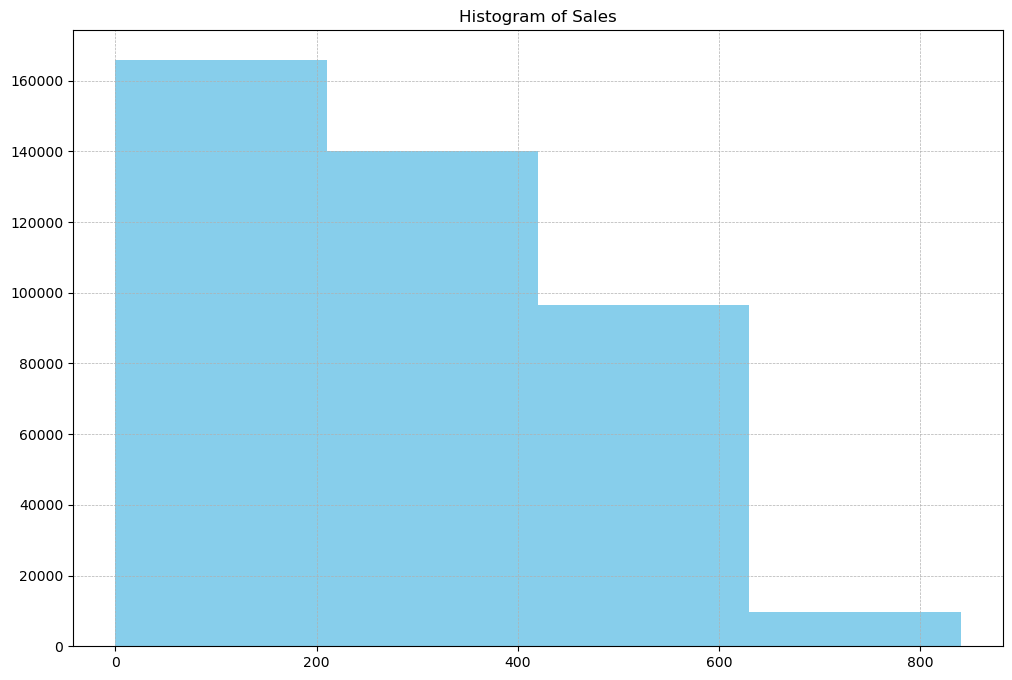

In [26]:
# Histogram for sales in ascending order
sorted_sales = df_no_outliers_final['sales'].sort_values(ascending=True)

plt.figure(figsize=(12, 8)) 
plt.hist(sorted_sales, bins=4, color='skyblue')
plt.title('Histogram of Sales')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

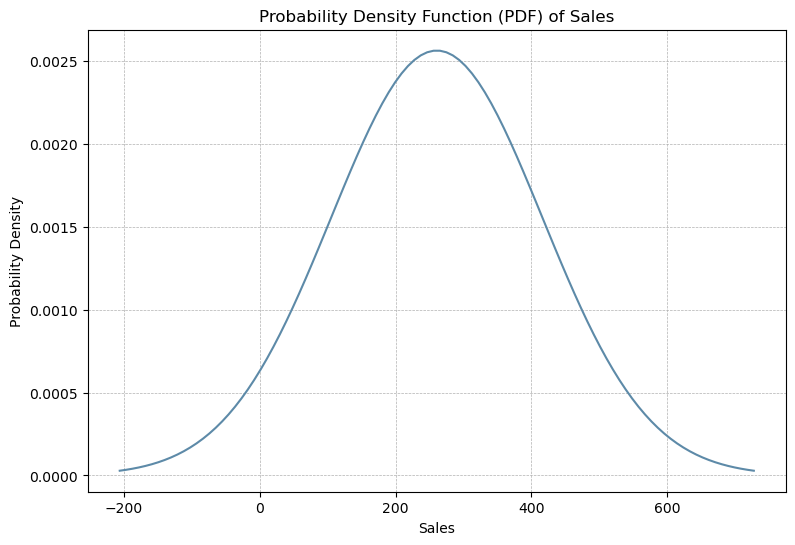

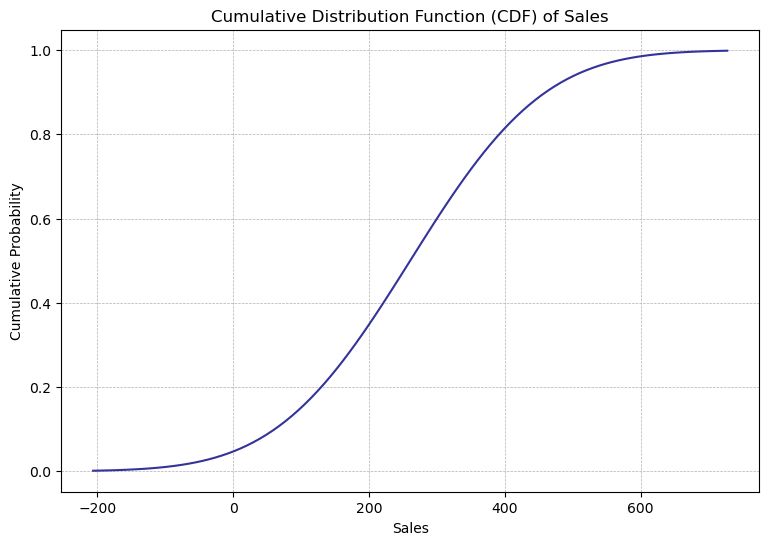

In [27]:
# Calculate the PDF and CDF for sales

mean = np.mean(df_no_outliers_final['sales'])
std = np.std(df_no_outliers_final['sales'])
x = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf = stats.norm.pdf(x, mean, std)
cdf = stats.norm.cdf(x, mean, std)

# Plot the PDF
plt.figure(figsize=(9, 6))
plt.plot(x, pdf, color='#5d8aa8')
plt.xlabel('Sales')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF) of Sales')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

# Plot the CDF
plt.figure(figsize=(9, 6))
plt.plot(x, cdf, color='#333399')
plt.xlabel('Sales')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Sales')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()



By looking at the recent six months of results, we may see the summary statistics data for item pricing, quantity sold, and sales to comprehend how we can increase sales in order to achieve high profit.


In [28]:
# summary statistics for the sales
df_no_outliers_final.describe()

,item_price,quantity_sold,sales
count,412493.000000,412493.000000,412493.000000
mean,163.100768,1.599404,260.670145
std,69.833517,0.646529,155.584522
min,35.000000,0.000000,0.000000
25%,100.000000,1.000000,140.000000
50%,150.000000,2.000000,220.000000
75%,220.000000,2.000000,420.000000
max,330.000000,3.000000,840.000000


In [29]:
#reading the csv file as a dataframe

df2 = pd.read_csv("C:\\Users\\EliteBook\\Documents\\Business Science\\Semester 5\\Data Wraggling\\Assignment 2\\Data_storm_dataset\\Tables\\Store-info.csv")

In [30]:
df2.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [31]:
df2.drop("shop_profile", axis=1, inplace=True)


In [32]:
df2

,shop_id,shop_area_sq_ft
0,SHOP047,528
1,SHOP009,676
2,SHOP083,676
3,SHOP117,676
4,SHOP042,676
...,...,...
119,SHOP087,527
120,SHOP050,411
121,SHOP061,699
122,SHOP056,597


We can merge Store-info and Historical-transaction-data tables to get extra information about stores in the Beverages Company XYZ.

In [33]:
# Merge Historical-transaction-data table and Store-info table
merged_df = pd.merge(df, df2, on='shop_id')

In [34]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220.00,2,678
1,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160.00,2,678
2,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150.00,2,678
3,GINGER BEER 1.5L,2021-12-10,1000053,VT9C,SHOP008,220.00,1,678
4,GINGER BEER 1.5L,2021-12-10,1000057,8QLS,SHOP008,165.37,1,678
...,...,...,...,...,...,...,...,...
473969,Not available,2021-12-09,7030409,QVA7,SHOP072,70.00,1,617
473970,FIT O ORANGE 200ML,2021-12-11,7030809,HXMG,SHOP072,140.00,2,617
473971,BOTTLED DRINKING WATER 500ML,2021-12-11,7030820,OUH2,SHOP072,35.00,1,617
473972,GINGER BEER 1.5L,2021-10-21,Not available,5IJM,SHOP072,220.00,1,617


In [35]:
# merge sales column to the merging table
merged_df['Sales'] = df_no_outliers_final['sales']

In [36]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,Sales
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220.00,2,678,440.0
1,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160.00,2,678,440.0
2,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150.00,2,678,320.0
3,GINGER BEER 1.5L,2021-12-10,1000053,VT9C,SHOP008,220.00,1,678,300.0
4,GINGER BEER 1.5L,2021-12-10,1000057,8QLS,SHOP008,165.37,1,678,NaN
...,...,...,...,...,...,...,...,...,...
473969,Not available,2021-12-09,7030409,QVA7,SHOP072,70.00,1,617,NaN
473970,FIT O ORANGE 200ML,2021-12-11,7030809,HXMG,SHOP072,140.00,2,617,440.0
473971,BOTTLED DRINKING WATER 500ML,2021-12-11,7030820,OUH2,SHOP072,35.00,1,617,NaN
473972,GINGER BEER 1.5L,2021-10-21,Not available,5IJM,SHOP072,220.00,1,617,NaN


In [37]:
# Replace NAN values of sales column by mean sales values

mean_sales = merged_df['Sales'].mean()
merged_df['Sales'] = merged_df['Sales'].fillna(mean_sales).astype(float)

In [38]:
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,Sales
0,ORANGE BARLEY 1.5L,2021-12-11,147,BGXA,SHOP008,220.00,2,678,440.000000
1,TONIC PET 500ML,2021-12-13,484,VN7V,SHOP008,160.00,2,678,440.000000
2,CREAM SODA 1L,2021-12-13,484,VN7V,SHOP008,150.00,2,678,320.000000
3,GINGER BEER 1.5L,2021-12-10,1000053,VT9C,SHOP008,220.00,1,678,300.000000
4,GINGER BEER 1.5L,2021-12-10,1000057,8QLS,SHOP008,165.37,1,678,260.670145
...,...,...,...,...,...,...,...,...,...
473969,Not available,2021-12-09,7030409,QVA7,SHOP072,70.00,1,617,260.670145
473970,FIT O ORANGE 200ML,2021-12-11,7030809,HXMG,SHOP072,140.00,2,617,440.000000
473971,BOTTLED DRINKING WATER 500ML,2021-12-11,7030820,OUH2,SHOP072,35.00,1,617,260.670145
473972,GINGER BEER 1.5L,2021-10-21,Not available,5IJM,SHOP072,220.00,1,617,260.670145


By displaying a line plot of sales along with both item price and quantity variables, we can see how these two factors have affected sales over the past six months and developing strategies to increase sales by observing item price and quantity variables behaviour.


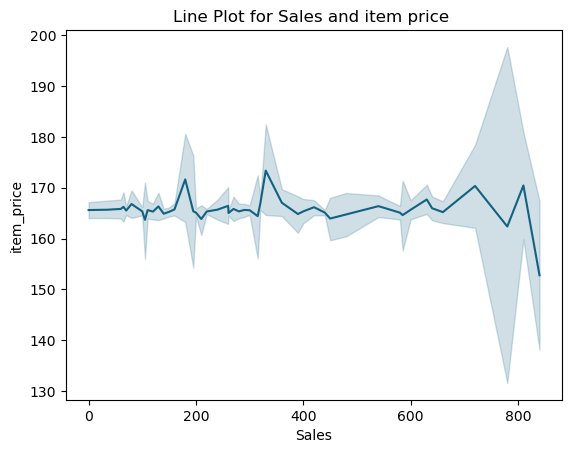

In [39]:
#Line Plot for Sales and item price

sns.lineplot(data=merged_df, x='Sales', y='item_price', color='#126180')
plt.xlabel('Sales')
plt.ylabel('item_price')
plt.title('Line Plot for Sales and item price ')
plt.show()



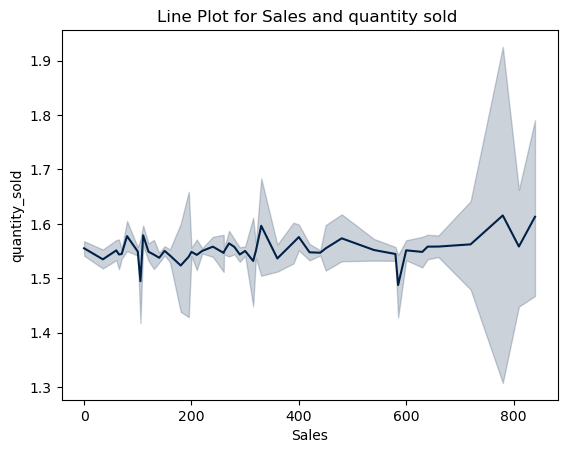

In [40]:
#Line Plot for Sales and quantity sold

merged_df['quantity_sold'] = merged_df['quantity_sold'].astype(int)

sns.lineplot(data=merged_df, x='Sales', y='quantity_sold', color='#002147')
plt.xlabel('Sales')
plt.ylabel('quantity_sold')
plt.title('Line Plot for Sales and quantity sold ')
plt.show()

# The insights of the critical factors 

By examining the sales of each store that distributes under the Beverages Company XYZ, we can figure out the total sales there and determine how to increase sales. Once we have an understanding of the tactics used by high-performing stores, we can apply them to our own low-performing stores.

In [41]:
# The total sales based on the store
pd.options.display.float_format = '{:.2f}'.format  # Format sales values

sales_by_shop = merged_df.groupby('shop_id')['Sales'].sum().reset_index()

sales_by_shop



,shop_id,Sales
0,SHOP001,540615.68
1,SHOP002,1246516.52
2,SHOP003,941671.05
3,SHOP004,882527.75
4,SHOP005,1094411.52
...,...,...
119,SHOP123,535483.31
120,SHOP124,1167467.34
121,SHOP125,485013.88
122,SHOP126,827454.09


In [42]:
# write to a csv file
sales_by_shop.to_csv('C:/Users/EliteBook/Documents/Business Science/Semester 5/Data Wraggling/Assignment 2/store and sales.csv', index=False)


In [43]:
# finding high sale store

highest_sales_shop = sales_by_shop.loc[sales_by_shop['Sales'].idxmax(), 'shop_id']

highest_sales_shop 

'SHOP043'

In [44]:
# finding top 5 high sales stores

top_5_shops = sales_by_shop.nlargest(5, 'Sales')

print("Top 5 shops with the highest sales:")
for index, row in top_5_shops.iterrows():
    shop_id = row['shop_id']
    sales = row['Sales']
    print("Shop ID:", shop_id, "| Sales:", sales)
    



Top 5 shops with the highest sales:
Shop ID: SHOP043 | Sales: 1735477.5644313965
Shop ID: SHOP011 | Sales: 1642642.0948961559
Shop ID: SHOP082 | Sales: 1577787.7650408612
Shop ID: SHOP086 | Sales: 1564095.549960848
Shop ID: SHOP084 | Sales: 1551362.6125655465


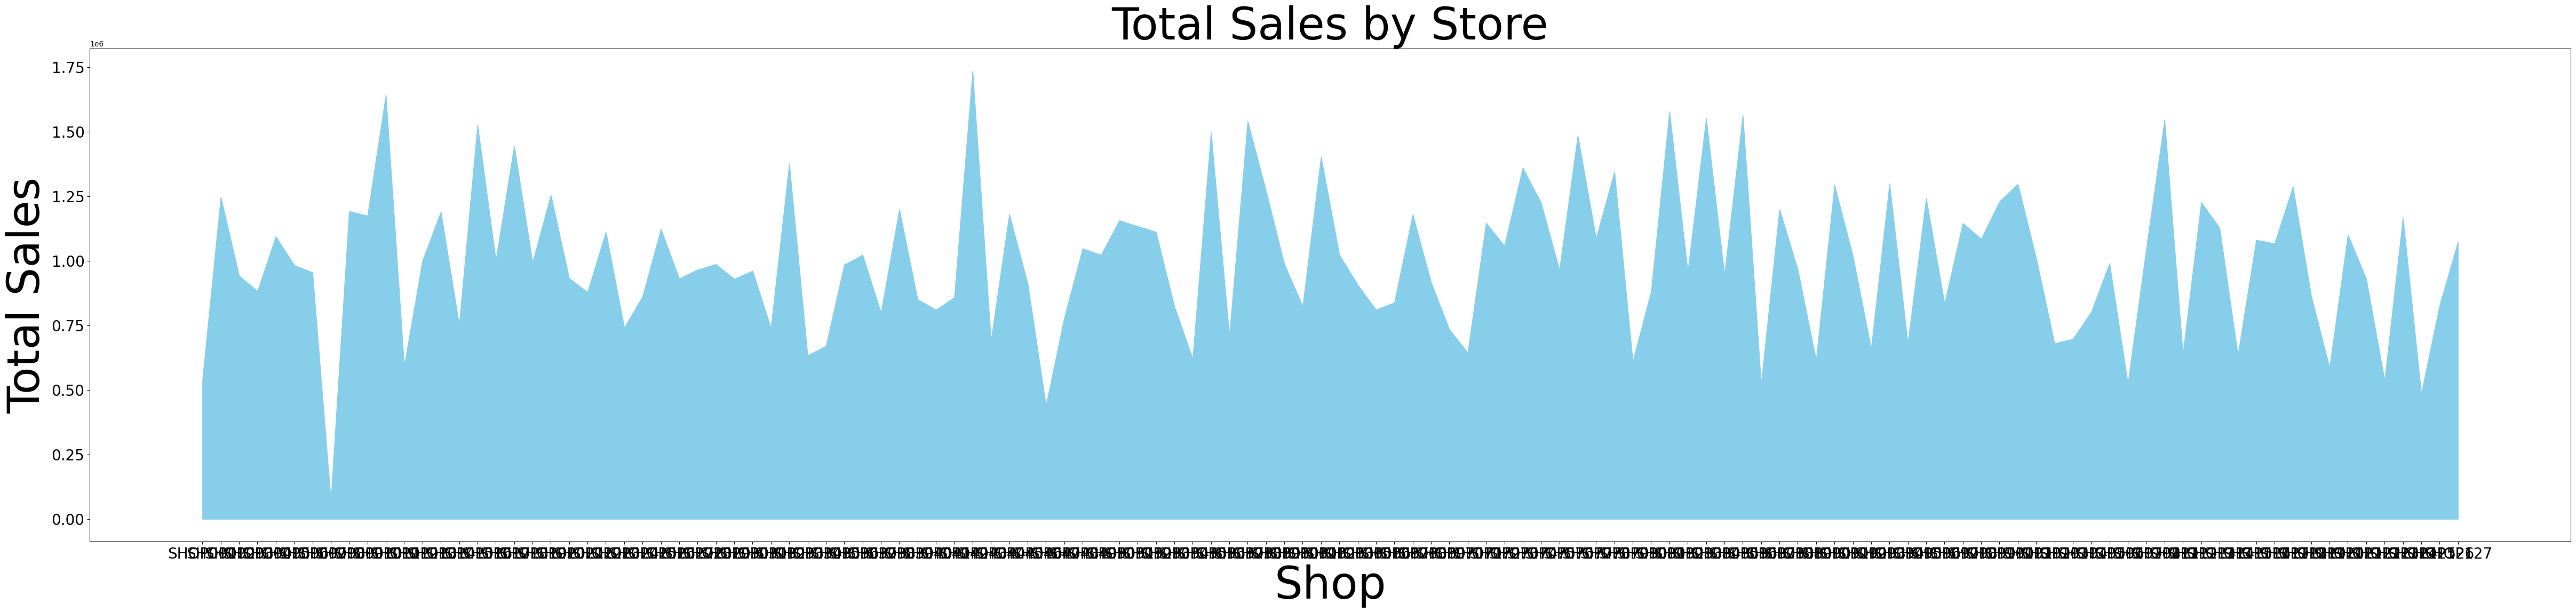

In [45]:
# Area chart for total sales by store

sales_by_shop = merged_df.groupby('shop_id')['Sales'].sum().reset_index()
sales_by_shop = sales_by_shop.sort_values('shop_id')

plt.figure(figsize=(60, 12)) 

# Plotting the area chart
plt.fill_between(sales_by_shop['shop_id'], sales_by_shop['Sales'],color='skyblue')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.title('Total Sales by Store',fontsize=60)
plt.xlabel('Shop',fontsize=60)
plt.ylabel('Total Sales',fontsize=60)


plt.show()


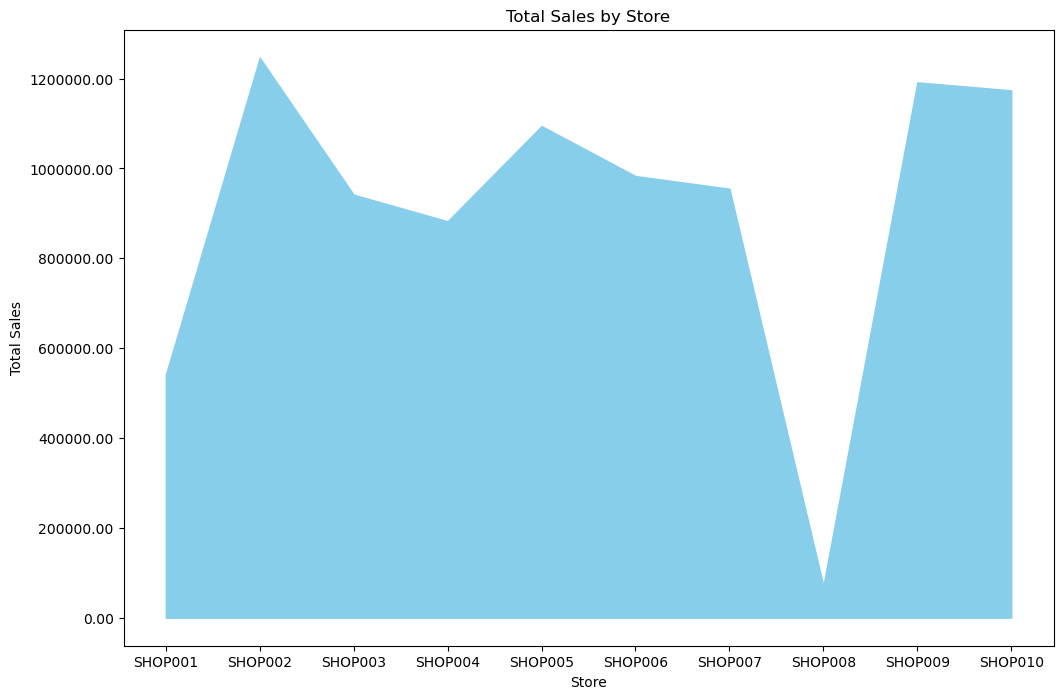

In [46]:
import matplotlib.ticker as ticker

num_shops_to_show = 10  

sales_by_shop = merged_df.groupby('shop_id')['Sales'].sum().reset_index()
sales_by_shop = sales_by_shop.sort_values('shop_id')

# Selecting a subset of shops to show
sales_subset = sales_by_shop[:num_shops_to_show]

plt.figure(figsize=(12,8))

# Plot the area chart for the subset 
plt.fill_between(sales_subset['shop_id'], sales_subset['Sales'], color='skyblue')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))


plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

plt.show()

By grouping customer id and sales, we can determine how many customers contribute to Beverages Company XYZ's sales. Then, in order to increase beverage sales, we can provide discounts to regular consumers.

In [47]:
# Total sales based on the customer 

sales_by_shop = merged_df.groupby('customer_id')['Sales'].sum().reset_index()
sales_by_shop = sales_by_shop[sales_by_shop['customer_id'] != '0.00E+00']
sales_by_shop.to_csv('total sales.csv', index=False)
sales_by_shop.head()


,customer_id,Sales
1,000S,2271.34
2,001E,980.00
3,001T,1430.67
4,002A,220.00
5,002B,140.00


In [48]:
# write to a csv file
sales_by_shop.to_csv('C:/Users/EliteBook/Documents/Business Science/Semester 5/Data Wraggling/Assignment 2/customers and sales.csv', index=False)


In [49]:
# Top 5 customers with the highest sales
top_5_customers = sales_by_shop.nlargest(5, 'Sales')

print("Top 5 customers with the highest sales:")
print(top_5_customers[['customer_id', 'Sales']])


Top 5 customers with the highest sales:
       customer_id    Sales
148838        RX33 25301.70
759           05QX 23003.35
22085         46C7 21188.04
187393        Z7JA 19288.35
32054         60IJ 16908.35


<Figure size 3000x6000 with 0 Axes>

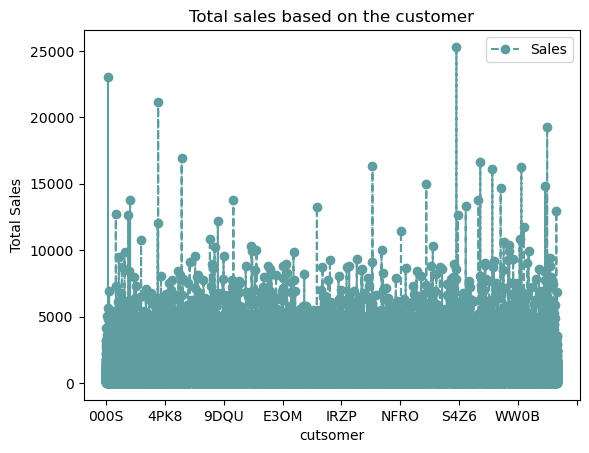

In [50]:
# Line chart for total sales based on the customer 

custom_palette = sns.color_palette(['cadetblue'])

sales_by_shop = merged_df.groupby('customer_id')['Sales'].sum().reset_index()
sales_by_shop = sales_by_shop[sales_by_shop['customer_id'] != '0.00E+00']
plt.figure(figsize=(30, 60))

# Plot the line chart
sales_by_shop.plot(x='customer_id', y='Sales', kind='line', color=custom_palette, linestyle='--', marker='o')


plt.xlabel('cutsomer')
plt.ylabel('Total Sales')
plt.title('Total sales based on the customer')
plt.show()


plt.show()

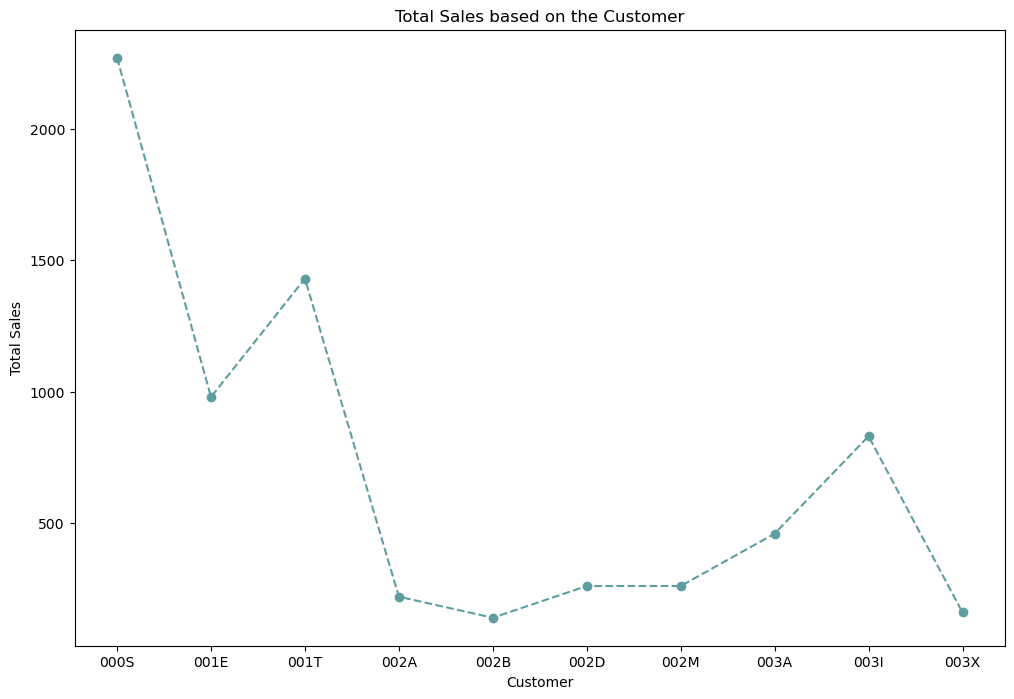

In [51]:
num_customers_to_show = 10  
custom_palette = sns.color_palette(['cadetblue'])

sales_by_customer = merged_df.groupby('customer_id')['Sales'].sum().reset_index()
sales_by_customer = sales_by_customer[sales_by_customer['customer_id'] != '0.00E+00']

# Selecting a subset of customers to show
sales_subset = sales_by_customer[:num_customers_to_show]

plt.figure(figsize=(12, 8))

# line chart
plt.plot(sales_subset['customer_id'], sales_subset['Sales'], color=custom_palette[0], linestyle='--', marker='o')

plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales based on the Customer')

selected_customers = sales_subset['customer_id']
plt.xticks(selected_customers)

plt.show()

By grouping customer id and shop id, we can determine the total number of consumers in every store. Then, we can determine which store has the most customers, with the goal of concentrating on that specific store to increase sales.

In [52]:
# finding total number of customers in each store

total_customers_by_store = merged_df.groupby('shop_id')['customer_id'].nunique().reset_index()
total_customers_by_store = total_customers_by_store.rename(columns={'customer_id': 'Total number of customers'})
total_customers_by_store



,shop_id,Total number of customers
0,SHOP001,1118
1,SHOP002,2577
2,SHOP003,2064
3,SHOP004,1744
4,SHOP005,2203
...,...,...
119,SHOP123,1159
120,SHOP124,2281
121,SHOP125,893
122,SHOP126,1769


In [53]:
# write to a csv file
total_customers_by_store.to_csv('C:/Users/EliteBook/Documents/Business Science/Semester 5/Data Wraggling/Assignment 2/store and customer count.csv', index=False)


In [54]:
# finding top 6 highest number of customers in stores

top_6_stores = total_customers_by_store.nlargest(6, 'Total number of customers')

print("Top 6 stores with the highest number of customers:")
print(top_6_stores[['shop_id', 'Total number of customers']])


Top 6 stores with the highest number of customers:
    shop_id  Total number of customers
42  SHOP043                       3501
10  SHOP011                       3186
84  SHOP086                       3164
15  SHOP016                       3091
61  SHOP062                       3081
80  SHOP082                       3007


<Figure size 1200x800 with 0 Axes>

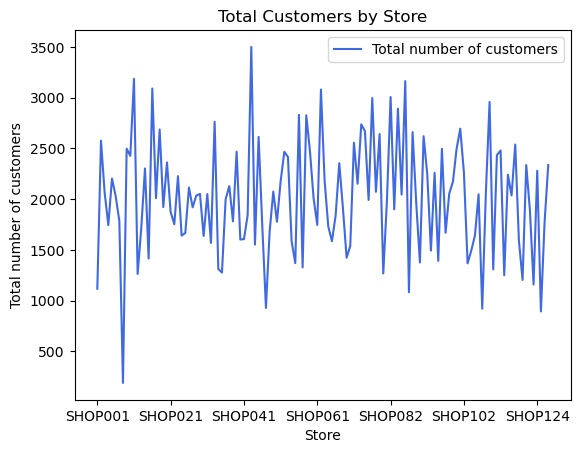

In [55]:
# Line chart for total number of customers in each store

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8)) 

custom_palette = sns.color_palette(['royalblue'])

# Plotting the line chart
total_customers_by_store.plot(x='shop_id', y='Total number of customers', kind='line', color=custom_palette)

plt.xlabel('Store')
plt.ylabel('Total number of customers')
plt.title('Total Customers by Store')
plt.show()


By developing a function based on an average customer count and an average sales amount, we are able to categorise the shop profile in each store as high, moderate, or low. If the average number of customers and average sales are both higher, then we consider that store to be high, if not low, or else it is moderate.

In [56]:
#  Assigning profile of given stores as High, Moderate, or Low

def assign_shop_profiling_labels(merged_df):
    # Calculating total number of customers by store
    total_customers_by_store = merged_df.groupby('shop_id')['customer_id'].nunique().reset_index()
    total_customers_by_store = total_customers_by_store.rename(columns={'customer_id': 'Total number of customers'})

    # Calculating total sales by store
    sales_by_shop = merged_df.groupby('shop_id')['Sales'].sum().reset_index()

    # Determining the average number of customers and average sales
    mean_customers = total_customers_by_store['Total number of customers'].mean()
    mean_sales = sales_by_shop['Sales'].mean()

    # Assign shop profiling based on values
    total_customers_by_store['shop profiling'] = 'low'
    total_customers_by_store.loc[total_customers_by_store['Total number of customers'] >=mean_customers , 'shop profiling'] = 'high'

    sales_by_shop['shop profiling'] = 'low'
    sales_by_shop.loc[sales_by_shop['Sales'] >=mean_sales, 'shop profiling'] = 'high'

    # Merge the two dataframes based on 'shop_id'
    merged_data = pd.merge(total_customers_by_store, sales_by_shop, on='shop_id', how='outer')

    # Determining the final shop profiling based on total sales and total number of customers
    merged_data['shop profiling'] = 'medium'
    merged_data.loc[(merged_data['Total number of customers'] >=mean_customers) & (merged_data['Sales'] >= mean_sales), 'shop profiling'] = 'high'
    merged_data.loc[(merged_data['Total number of customers'] < mean_customers) & (merged_data['Sales'] < mean_sales), 'shop profiling'] = 'low'
    

    

    return merged_data


pd.options.display.float_format = '{:.2f}'.format 
result_df = assign_shop_profiling_labels(merged_df)

# writing to a csv file called Shop profile
result_df[['shop_id', 'shop profiling']].to_csv('C:/Users/EliteBook/Documents/Business Science/Semester 5/Data Wraggling/Assignment 2/Shop profile.csv', index=False)



In [57]:
result_df[['shop_id', 'shop profiling']]

,shop_id,shop profiling
0,SHOP001,low
1,SHOP002,high
2,SHOP003,medium
3,SHOP004,low
4,SHOP005,high
...,...,...
119,SHOP123,low
120,SHOP124,high
121,SHOP125,low
122,SHOP126,low


By developing a clustered column chart, we are able to see how shop profiling behaves in stores with clarity.


<Figure size 1200x800 with 0 Axes>

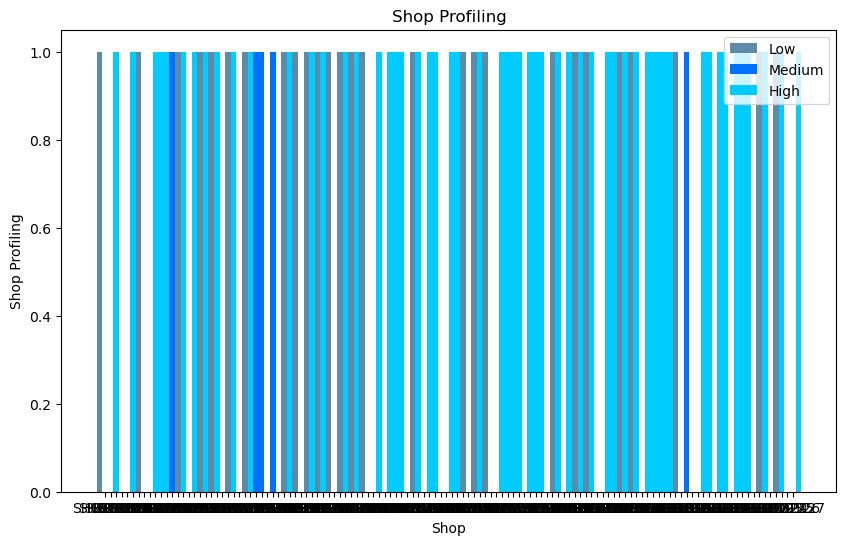

In [58]:
# Clustered column chart for shop profiling

plt.figure(figsize=(12,8)) 

shop_ids = result_df['shop_id']
shop_profiling = result_df['shop profiling']

low_profiling = (shop_profiling == 'low').astype(int)
medium_profiling = (shop_profiling == 'medium').astype(int)
high_profiling = (shop_profiling == 'high').astype(int)

bar_width = 1
index = np.arange(len(shop_ids))

plt.figure(figsize=(10, 6))
plt.bar(index, low_profiling, width=bar_width, color='#5d8aa8', label='Low')
plt.bar(index + bar_width, medium_profiling, width=bar_width, color='#0070ff', label='Medium')
plt.bar(index + (2 * bar_width), high_profiling, width=bar_width, color='#00ccff', label='High')

plt.xlabel('Shop')
plt.ylabel('Shop Profiling')
plt.title('Shop Profiling')
plt.xticks(index + bar_width, shop_ids)
plt.legend(loc='upper right')
plt.show()

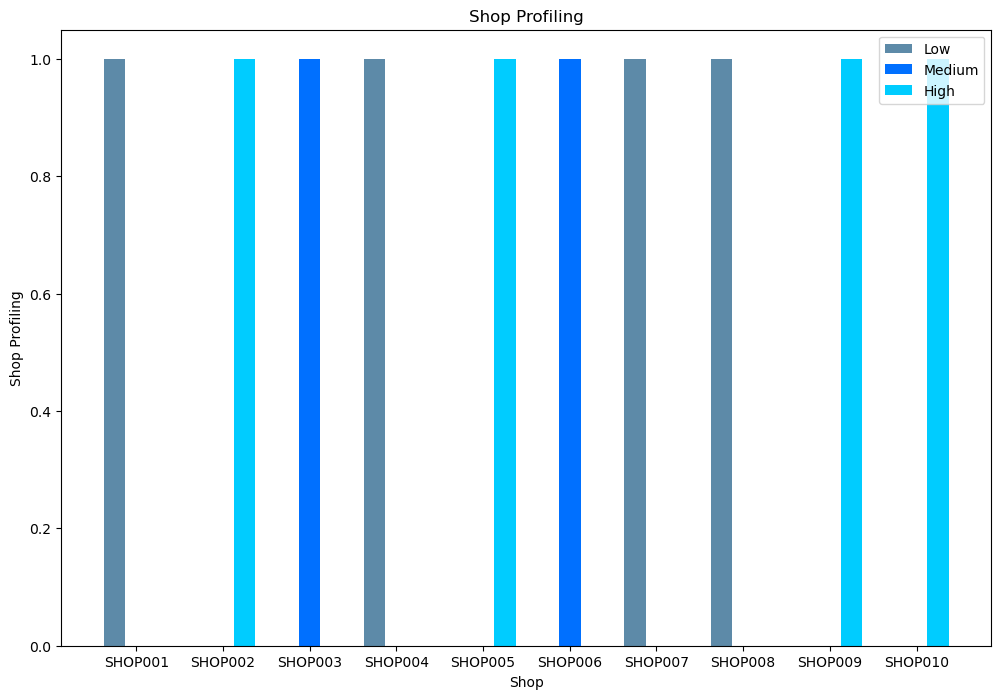

In [59]:
num_shops_to_show = 10 

plt.figure(figsize=(12, 8))

shop_ids = result_df['shop_id']
shop_profiling = result_df['shop profiling']

low_profiling = (shop_profiling == 'low').astype(int)
medium_profiling = (shop_profiling == 'medium').astype(int)
high_profiling = (shop_profiling == 'high').astype(int)

# Select a subset of shops to show
shop_ids_subset = shop_ids[:num_shops_to_show]
low_profiling_subset = low_profiling[:num_shops_to_show]
medium_profiling_subset = medium_profiling[:num_shops_to_show]
high_profiling_subset = high_profiling[:num_shops_to_show]

bar_width = 0.25
index = np.arange(len(shop_ids_subset))

plt.bar(index, low_profiling_subset, width=bar_width, color='#5d8aa8', label='Low')
plt.bar(index + bar_width, medium_profiling_subset, width=bar_width, color='#0070ff', label='Medium')
plt.bar(index + (2 * bar_width), high_profiling_subset, width=bar_width, color='#00ccff', label='High')

plt.xlabel('Shop')
plt.ylabel('Shop Profiling')
plt.title('Shop Profiling' )
plt.xticks(index + bar_width, shop_ids_subset)
plt.legend(loc='upper right')
plt.show()

We can identify the number of low , medium and high shop profiling stores so that we can improve the sales in Beverages Company XYZ.

In [60]:
# finding the number of low , medium and high stores

shop_profiling_counts = result_df['shop profiling'].value_counts()

low_count = shop_profiling_counts['low']
medium_count = shop_profiling_counts['medium']
high_count = shop_profiling_counts['high']

print("Low stores:", low_count)
print("Medium stores:", medium_count)
print("High stores:", high_count)


Low stores: 58
Medium stores: 10
High stores: 56


We can identify cumulative sales by shop area square feet by sorting shop area square feet in ascending order and finding how store square feet affect to the sales and trying implement strategies to enhance sales.

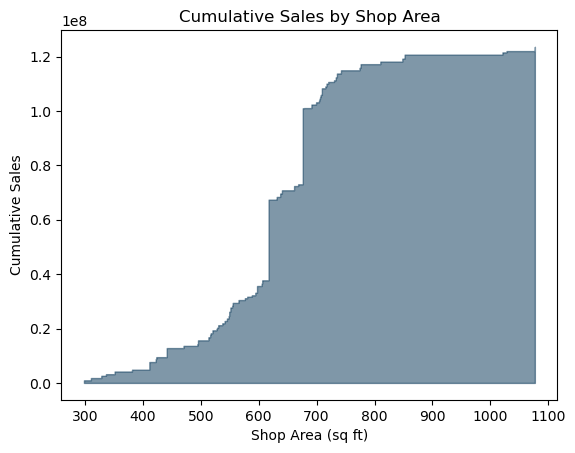

In [61]:
# area chart for cumulative sales by shop area

merged_df_sorted = merged_df.sort_values('shop_area_sq_ft')

# Calculating the cumulative sum of Sales
cumulative_sales = merged_df_sorted['Sales'].cumsum()

# area chart
plt.fill_between(merged_df_sorted['shop_area_sq_ft'], cumulative_sales, alpha=0.5,color="#003153")


plt.xlabel('Shop Area (sq ft)')
plt.ylabel('Cumulative Sales')
plt.title('Cumulative Sales by Shop Area')


plt.show()

Grouping the sales according to transaction date will allow us to calculate the number of sales in days.Therefore, by carefully examining the transaction dates, we can determine which days customers are likely to purchase beverages, allowing us to considerably enhance some techniques.


In [62]:
# grouping sales by transaction date

sales_by_date = merged_df.groupby('transaction_date')['Sales'].sum().reset_index()

# write to a csv file
sales_by_date.to_csv('C:/Users/EliteBook/Documents/Business Science/Semester 5/Data Wraggling/Assignment 2/transaction and sales.csv', index=False)

sales_by_date

,transaction_date,Sales
0,2021-10-15,2188678.29
1,2021-10-16,2541803.40
2,2021-10-17,2592454.49
3,2021-10-18,2286185.31
4,2021-10-19,2769072.07
...,...,...
57,2021-12-11,3942131.11
58,2021-12-12,3386924.61
59,2021-12-13,1982766.69
60,2021-12-14,2142366.08


In [63]:
merged_df.sample(10)

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,Sales
426475,CREAM SODA 1.5L,2021-11-26,2309233,HCEK,SHOP050,220.00,1,411,260.67
317104,NECTO 1.5L,2021-12-10,4187809,1UYJ,SHOP010,220.00,2,617,440.00
73098,CREAM SODA 1.5L,2021-11-18,98673,39V3,SHOP096,165.37,1,676,290.00
89812,NECTO 1.5L,2021-12-06,2371002,7TS4,SHOP017,220.00,1,617,440.00
1329,Not available,2021-10-22,4000604,HYK9,SHOP112,165.37,1,668,150.00
4247,GINGER BEER 1.5L,2021-12-11,1009036,YDBP,SHOP055,220.00,1,720,140.00
113277,CREAM SODA 500ML,2021-11-15,1232913,MN4N,SHOP121,100.00,2,555,400.00
451560,FIT O ORANGE 200ML,2021-10-21,916573,6XED,SHOP082,120.00,2,549,440.00
26829,NECTO 1.5L,2021-12-06,1044644,OK46,SHOP054,220.00,1,1021,200.00
123984,GINGER BEER 1L,2021-10-29,1256434,J5Q8,SHOP098,150.00,2,676,440.00


# Results



The top five stores with the highest revenue can be found by assessing the overall sales depending on the store. This will help Beverages Company XYZ. focus on vending beverage items in those stores with the highest sales. In order to increase sales, we can offer discounts for such significant customers, and other crucial strategies for new customers as well. 

We can also identify the regular customers in those stores as well as the customers who are more affecting to increase sales. Additionally, which days have more potential clients for increased sales so that we may employ some sort of approach to further boost sales.

We can categorise stores as high, medium, or low since we can identify a significant number of customers and sales. This helps us to understand how the store has a large impact on sales in Beverages Company XYZ and allows us to establish some tactics into place that will strengthen and increase consumer trust.